In [1]:
# import libraries 

from bs4 import BeautifulSoup #Parsing HTML and XML documents
import requests #Send HTTP requests to URLs to retrieve web page content
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn library for data visualization


In [2]:
pages=[]

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}


for i in range(0,10):
    url='https://www.rossmann.de/de/make-up/c/olcat1_1?q=%3Arelevance%3A&page=' + str(i)
    src=requests.get(url,headers=headers)
    page = BeautifulSoup(src.content, 'lxml') #.body
    pages.append(page)
    posts= page.find_all("div", class_="rm-product__title")
    
print('Pages iterated: ' + str(len(pages)))



Pages iterated: 10


In [3]:
posts=[]

for page in pages:
    for post in page.find_all("div", class_="rm-tile-product"):
        posts.append(post)
        
        # Extract the required attributes
        brand = post.get('data-product-brand')
        price = post.get('data-product-price')
        name = post.get('data-product-name')
        #print(f'Brand: {brand}, Price: {price}, Name: {name}')
        
print('posts found :', len(posts))


posts found : 240


In [4]:
reviews=[]

for post in posts:
    review_element = post.find_next("div", class_="rm-rating")
    if review_element:
        review = review_element.text.strip()
        reviews.append(int(review))
    else:
        reviews.append(None)
    
    
#reviews

In [5]:
prices=[]

for post in posts:
    # Extract the price from the dictionary using the 'data-product-price' key
    price = post.get('data-product-price')
    prices.append(float(price))
    
#prices


In [6]:
brands=[]

for post in posts:
    brand=post.get('data-product-brand')
    brands.append(brand)
    
#brands

In [7]:
ProductsName=[]
for post in posts:
    name=post.find("div",class_="rm-product__title")
    if name:
        names=name.text.strip()
        ProductsName.append(names)
    else:
        ProductsName.append(None)
        
#ProductsName


In [8]:
weight=[]
for post in posts:
    weights=post.find("div",class_="rm-price__base")
    weight_=weights.text.strip()
    weight.append(weight_)
#weight

In [9]:
df = pd.DataFrame(list(zip(ProductsName,brands,reviews,prices)),columns=['ProductsName','brands','reviews','prices'])
df

,ProductsName,brands,reviews,prices
0,Bronze to Paradise 02 Baby one more tan,L’Oréal Paris,187,12.99
1,I LOVE EXTREME crazy volume mascara,essence,85,2.39
2,Lash Sensational Sky High Very Black,Maybelline New York,334,10.39
3,Lash Sensational Sky High WTP Mascara Black,Maybelline New York,334,10.39
4,Masterpiece 2in1 Lash WOW Mascara,Max Factor,238,10.39
...,...,...,...,...
235,Aqua Jelly Make-up 03 creamy natural,HYPOAllergenic,8,5.59
236,Mascara Masterpiece,Max Factor,31,8.79
237,Melting Moisture Lipstick 01 soft cream,HYPOAllergenic,2,4.54
238,Longwear Hydrating Balm Foundation 01 Alabaster,HYPOAllergenic,5,6.99


In [10]:
#df.to_excel('data.xlsx')

In [11]:
df1 = pd.DataFrame(list(zip(df['brands'].value_counts().index.tolist(), df['brands'].value_counts().values)), columns=['brand', 'Number of products'])
df1

,brand,Number of products
0,HYPOAllergenic,81
1,wet n wild,55
2,Maybelline New York,30
3,essence,16
4,Catrice,12
5,NailD,11
6,Max Factor,9
7,RIVAL DE LOOP,7
8,essie,6
9,Tweezerman,3


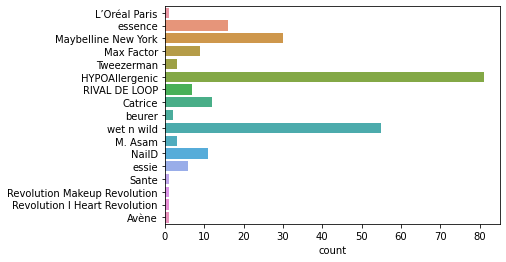

In [12]:
hist=sns.countplot(y=brands)

Text(0, 0.5, 'Count of Products')

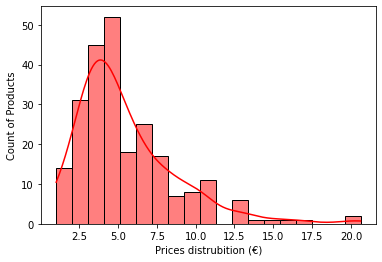

In [13]:
# Create a histogram of the 'prices' list, where 'x=prices' indicates that the prices will be displayed on the x-axis 
hist=sns.histplot(x=prices,kde=True, color='red',edgecolor='black') #kde=Kernel Density Estimation

# Set the x-axis label and title for the plot
hist.set_xlabel('Prices distrubition (€)')
plt.ylabel('Count of Products')
